# 2. Data Transformation

### 2.1. Load Data

In [12]:
# ==================== Import Necessary Libraries ====================

# ⚡ Data Handling
import os
import pickle  # For saving models and encoders
import numpy as np
import pandas as pd

# ⚡ Preprocessing & Feature Engineering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

# ⚡ Splitting & Imbalanced Data Handling
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.combine import SMOTETomek

# ⚡ Machine Learning Models
from sklearn.ensemble import RandomForestClassifier

# ⚡ Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ⚡ Suppress Warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# ⚡ Visualization Settings
plt.style.use('ggplot')
sns.set_theme(style='whitegrid', palette='pastel')

# ==================== End of Import Block ====================


In [13]:
# ----------------------- Load and Preview Data -----------------------
# Load the preprocessed data
df = pd.read_csv('preprocessed_data/preprocessed_data.csv')

# Print success message and dataset info
print(f"Data loaded successfully!")
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

# Display the first 5 rows
display(df.head())  # Use display() for better formatting in Jupyter Notebooks


Data loaded successfully!
Dataset Shape: 7043 rows × 20 columns



,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2.2. Extract features and Target

In [14]:
# Define feature matrix (X) and target variable (y)
X = df.drop(columns=['churn'])  # Drop the target column to get features
y = df['churn']  # Select the target column

# Print shape for confirmation
print(f"Features Shape: {X.shape[0]} rows × {X.shape[1]} columns")
print(f"Target Shape: {y.shape[0]} rows")

# Display first few rows of X and y
display(X.head(), y.head())  # Works best in Jupyter Notebook


Features Shape: 7043 rows × 19 columns
Target Shape: 7043 rows


,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


0     No
1     No
2    Yes
3     No
4    Yes
Name: churn, dtype: object

In [15]:
# -------------------- Find and Display Unique Values --------------------

# Define a function to find and display unique values with counts and data types
def display_unique_values(dataframe, max_display=10):
    unique_dict = {col: dataframe[col].unique() for col in dataframe.columns}

    # Create a formatted DataFrame for better visualization
    unique_summary = pd.DataFrame({
        "Column": unique_dict.keys(),
        "Data Type": [dataframe[col].dtype for col in dataframe.columns],
        "Unique Count": [len(values) for values in unique_dict.values()],
        "Sample Unique Values": [list(values[:max_display]) for values in unique_dict.values()]
    })

    # Display the unique values summary
    print("Unique Values Summary:")
    display(unique_summary)  # Best for Jupyter, otherwise use print(unique_summary.to_string())

# Call the function to display unique values for X
display_unique_values(X)


Unique Values Summary:


,Column,Data Type,Unique Count,Sample Unique Values
0,customer_id,object,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,senior_citizen,object,2,"[No, Yes]"
2,partner,object,2,"[Yes, No]"
3,dependents,object,2,"[No, Yes]"
4,tenure,int64,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13]"
5,phone_service,object,2,"[No, Yes]"
6,multiple_lines,object,2,"[No, Yes]"
7,internet_service,object,3,"[DSL, Fiber optic, No]"
8,online_security,object,2,"[No, Yes]"
9,online_backup,object,2,"[Yes, No]"


In [16]:
# -------------------- Transform Target Variable (y - Churn) --------------------

# Print unique values before transformation
print(f"Unique values before transformation: {y.unique()}")

# Check if transformation is needed (avoid double mapping)
if set(y.unique()) == {'Yes', 'No'}:
    y = y.map({'Yes': 1, 'No': 0})
    print("Transformation applied: 'Yes' → 1, 'No' → 0")
else:
    print("No transformation needed, values are already numeric.")

# Print unique values after transformation
print(f"Unique values after transformation: {y.unique()}")


Unique values before transformation: ['No' 'Yes']
Transformation applied: 'Yes' → 1, 'No' → 0
Unique values after transformation: [0 1]


### 2.3. Data Spliting

In [17]:
# -------------------------- Separate Customer_ID --------------------------
customer_ids = X['customer_id']  # Store Customer_ID separately

# Drop Customer_ID from feature set
X_filtered = X.drop(columns=['customer_id'], errors='ignore')

# -------------------------- Split into Training & Testing Sets --------------------------
X_train, X_test, y_train, y_test, customer_train, customer_test = train_test_split(
    X_filtered, y, customer_ids,
    test_size=0.2,  
    random_state=42,  
    stratify=y
)

# Print dataset shapes
print(f"✅ Train-Test Split Completed (Customer_ID Stored Separately)")
print(f"📊 X_train Shape: {X_train.shape}, X_test Shape: {X_test.shape}")
print(f"📊 y_train Shape: {y_train.shape}, y_test Shape: {y_test.shape}")
print(f"🔹 Customer_ID Stored: {customer_train.shape}, {customer_test.shape}")


✅ Train-Test Split Completed (Customer_ID Stored Separately)
📊 X_train Shape: (5634, 18), X_test Shape: (1409, 18)
📊 y_train Shape: (5634,), y_test Shape: (1409,)
🔹 Customer_ID Stored: (5634,), (1409,)


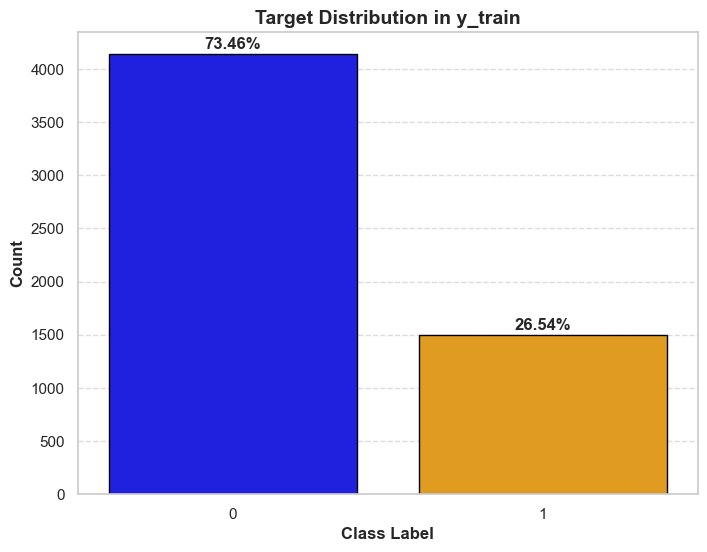

In [18]:
# -------------------- Plot Class Distribution in y_train --------------------

# Get value counts and percentages
class_counts = y_train.value_counts()
percentages = (class_counts / class_counts.sum()) * 100

# Create a bar plot with proper hue handling
plt.figure(figsize=(8, 6))
sns.barplot(
    x=class_counts.index, y=class_counts.values, hue=class_counts.index, 
    palette=['blue', 'orange'], edgecolor='black', legend=False  # Fix for FutureWarning
)

# Add labels and title
plt.xlabel('Class Label', fontsize=12, weight='bold')
plt.ylabel('Count', fontsize=12, weight='bold')
plt.title('Target Distribution in y_train', fontsize=14, weight='bold')

# Add percentage labels on bars
for i, v in enumerate(class_counts):
    plt.text(i, v + 50, f"{percentages[i]:.2f}%", ha='center', fontsize=12, fontweight='bold')

# Formatting
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [19]:

# -------------------------- Save Data to Files --------------------------
# Create directory if it doesn’t exist
save_dir = "split_data"
os.makedirs(save_dir, exist_ok=True)

# Define filenames
file_paths = {
    "X_train": "X_train.csv",
    "X_test": "X_test.csv",
    "y_train": "y_train.csv",
    "y_test": "y_test.csv",
    "customer_train": "customer_train.csv",
    "customer_test": "customer_test.csv"
}

# Save all datasets
for key, filename in file_paths.items():
    file_path = os.path.join(save_dir, filename)
    data = eval(key)  # Get the corresponding variable

    try:
        # Save to CSV (use to_pickle for better data integrity if needed)
        data.to_csv(file_path, index=False)
        print(f"✅ {key} saved successfully: {file_path}")
    except Exception as e:
        print(f"❌ Error saving {key}: {e}")


✅ X_train saved successfully: split_data\X_train.csv
✅ X_test saved successfully: split_data\X_test.csv
✅ y_train saved successfully: split_data\y_train.csv
✅ y_test saved successfully: split_data\y_test.csv
✅ customer_train saved successfully: split_data\customer_train.csv
✅ customer_test saved successfully: split_data\customer_test.csv


### 2.4. Data Encoding

#### 2.4.1 Label Encoding

In [20]:
# ----------------------- Label Encoding for Categorical Variables -----------------------

# List of categorical columns to encode
label_encode_cols = [
    'senior_citizen', 'partner', 'dependents',
    'phone_service', 'paperless_billing', 'multiple_lines', 'online_security',
    'online_backup', 'device_protection', 'tech_support',
    'streaming_tv', 'streaming_movies'
]

# Create a dictionary to store LabelEncoders
label_encoders = {}

# Apply Label Encoding to both X_train and X_test
for col in label_encode_cols:
    if col in X_train.columns:  # Check if column exists to avoid errors
        le = LabelEncoder()
        
        # Fit on training data and transform both training and testing data
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])  # Ensure consistency
        
        # Store the encoder
        label_encoders[col] = le

# Save LabelEncoders to a .pkl file
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print(f"✅ Label Encoding completed for {len(label_encoders)} columns.")
print("🔹 Encoders saved successfully as 'label_encoders.pkl'.")
# --------------------------------------------------------------------------------------


✅ Label Encoding completed for 12 columns.
🔹 Encoders saved successfully as 'label_encoders.pkl'.


In [21]:
# ----------------------- Display Label Encoding Mappings -----------------------

# Create a list to store mappings
mappings = []

# Iterate through the dictionary of LabelEncoders
for col, le in label_encoders.items():
    for index, label in enumerate(le.classes_):
        mappings.append({"Column": col, "Original Value": label, "Encoded Value": index})

# Convert to DataFrame for better visualization
mappings_df = pd.DataFrame(mappings)

# Sort by column name for better readability
mappings_df = mappings_df.sort_values(by=["Column", "Encoded Value"])

# Display mappings
print(f"✅ Label Encoding Mappings for {len(label_encoders)} columns:\n")
display(mappings_df)  # Works best in Jupyter; use print(mappings_df.to_string()) otherwise

# --------------------------------------------------------------------------------


✅ Label Encoding Mappings for 12 columns:



,Column,Original Value,Encoded Value
4,dependents,No,0
5,dependents,Yes,1
16,device_protection,No,0
17,device_protection,Yes,1
10,multiple_lines,No,0
11,multiple_lines,Yes,1
14,online_backup,No,0
15,online_backup,Yes,1
12,online_security,No,0
13,online_security,Yes,1


#### 2.4.2 One -Hot Encoding

In [22]:
import os
import pickle
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# ----------------------- One-Hot Encoding for Categorical Variables -----------------------

# Define categorical columns for one-hot encoding
one_hot_encode_cols = ['contract', 'payment_method', 'internet_service']


# Save the list of categorical columns for reference
with open('one_hot_columns.pkl', 'wb') as f:
    pickle.dump(one_hot_encode_cols, f)

# Initialize OneHotEncoder with drop='first' to remove the first category
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Fit OneHotEncoder on X_train
ohe.fit(X_train[one_hot_encode_cols])

# Capture the actual dropped category for each column
dropped_categories = {col: ohe.categories_[i][0] for i, col in enumerate(one_hot_encode_cols)}

# ✅ Fixed: Save the dropped categories correctly
with open("dropped_categories.pkl", "wb") as f:
    pickle.dump(dropped_categories, f)

# Transform X_train and X_test using the fitted encoder
X_train_ohe = ohe.transform(X_train[one_hot_encode_cols])
X_test_ohe = ohe.transform(X_test[one_hot_encode_cols])  # Apply the same transformation

# Convert encoded arrays to DataFrames with proper column names
encoded_col_names = ohe.get_feature_names_out(one_hot_encode_cols)
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoded_col_names, index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoded_col_names, index=X_test.index)

# Save the trained OneHotEncoder for future use
with open('one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(ohe, f)

# Save the transformed feature names to ensure consistency
with open('one_hot_encoded_column_names.pkl', 'wb') as f:
    pickle.dump(list(encoded_col_names), f)

# Drop original categorical columns from X_train and X_test
X_train.drop(columns=one_hot_encode_cols, inplace=True)
X_test.drop(columns=one_hot_encode_cols, inplace=True)

# Concatenate encoded features with original data
X_train_encoded = pd.concat([X_train, X_train_ohe], axis=1)
X_test_encoded = pd.concat([X_test, X_test_ohe], axis=1)

print("✅ One-hot encoding completed. Encoders, feature names, and dropped categories saved successfully.")

# ----------------------- Convert Boolean Columns to Integers -----------------------

# Function to convert boolean columns to integers
def convert_boolean_to_int(df):
    for col in df.columns:
        if df[col].dtype == 'bool':
            df[col] = df[col].astype(int)

# Apply conversion to both train & test sets
convert_boolean_to_int(X_train_encoded)
convert_boolean_to_int(X_test_encoded)

print("✅ Boolean columns converted to integers.")

# ---------------------- Save Encoded Data ----------------------

# Create directory for encoded data
save_dir = "encoded_data"
os.makedirs(save_dir, exist_ok=True)

# Define file paths
train_encoded_path = os.path.join(save_dir, "X_train_encoded.csv")
test_encoded_path = os.path.join(save_dir, "X_test_encoded.csv")

# Save the transformed datasets
X_train_encoded.to_csv(train_encoded_path, index=False)
X_test_encoded.to_csv(test_encoded_path, index=False)

# Confirmation messages
print("\n✅ One-hot encoding completed, and transformed datasets saved successfully!")
print(f"🔹 X_train_encoded saved at '{train_encoded_path}'")
print(f"🔹 X_test_encoded saved at '{test_encoded_path}'")


✅ One-hot encoding completed. Encoders, feature names, and dropped categories saved successfully.
✅ Boolean columns converted to integers.

✅ One-hot encoding completed, and transformed datasets saved successfully!
🔹 X_train_encoded saved at 'encoded_data\X_train_encoded.csv'
🔹 X_test_encoded saved at 'encoded_data\X_test_encoded.csv'


In [23]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 3738 to 5639
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          5634 non-null   int32  
 1   partner                                 5634 non-null   int32  
 2   dependents                              5634 non-null   int32  
 3   tenure                                  5634 non-null   int64  
 4   phone_service                           5634 non-null   int32  
 5   multiple_lines                          5634 non-null   int32  
 6   online_security                         5634 non-null   int32  
 7   online_backup                           5634 non-null   int32  
 8   device_protection                       5634 non-null   int32  
 9   tech_support                            5634 non-null   int32  
 10  streaming_tv                            5634 non-null   int32 

In [24]:
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 437 to 5613
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          1409 non-null   int32  
 1   partner                                 1409 non-null   int32  
 2   dependents                              1409 non-null   int32  
 3   tenure                                  1409 non-null   int64  
 4   phone_service                           1409 non-null   int32  
 5   multiple_lines                          1409 non-null   int32  
 6   online_security                         1409 non-null   int32  
 7   online_backup                           1409 non-null   int32  
 8   device_protection                       1409 non-null   int32  
 9   tech_support                            1409 non-null   int32  
 10  streaming_tv                            1409 non-null   int32  

### 2.5 Data Balancing with SMOTETomek

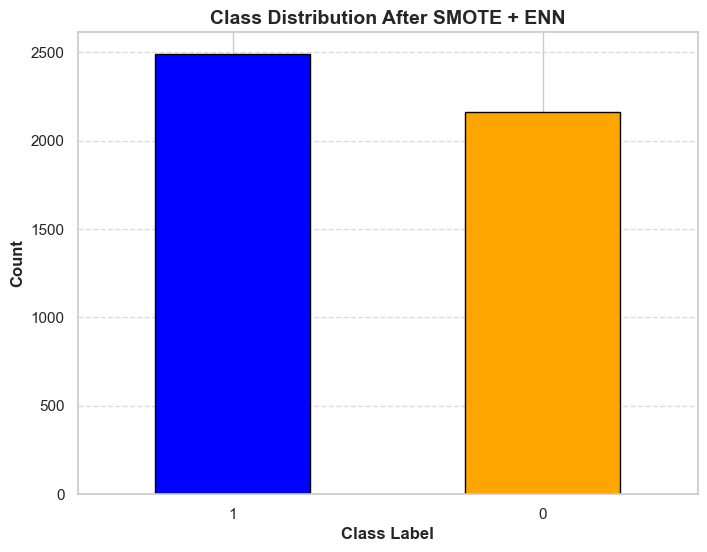


📊 Class Distribution After SMOTE + ENN:
churn
1    2489
0    2163
Name: count, dtype: int64
✅ Balanced data saved as 'X_train_balanced.csv' and 'y_train_balanced.csv'.


In [25]:
# -------------------- Data Balancing with SMOTE + Edited Nearest Neighbors --------------------

from imblearn.combine import SMOTEENN

# Apply Hybrid Balancing: SMOTE + Edited Nearest Neighbors (SMOTEENN)
smoteenn = SMOTEENN(random_state=42)
X_train_balanced, y_train_balanced = smoteenn.fit_resample(X_train_encoded, y_train)

# -------------------- Plot Class Distribution After Balancing --------------------
plt.figure(figsize=(8, 6))
y_train_balanced.value_counts().plot(kind='bar', color=['blue', 'orange'], edgecolor='black')

# Add labels and title
plt.xlabel('Class Label', fontsize=12, weight='bold')
plt.ylabel('Count', fontsize=12, weight='bold')
plt.title('Class Distribution After SMOTE + ENN', fontsize=14, weight='bold')

# Display the plot
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# -------------------- Print New Class Distribution --------------------
print("\n📊 Class Distribution After SMOTE + ENN:")
print(y_train_balanced.value_counts())

#----------------------- Save Balanced Dataset -----------------------
# Create directory if it doesn't exist
save_dir = "balanced_data"
os.makedirs(save_dir, exist_ok=True)

# Define file paths
x_train_balanced_path = os.path.join(save_dir, "X_train_balanced.csv")
y_train_balanced_path = os.path.join(save_dir, "y_train_balanced.csv")

X_train_balanced.to_csv(x_train_balanced_path, index=False)
y_train_balanced.to_csv(y_train_balanced_path, index=False)

print("✅ Balanced data saved as 'X_train_balanced.csv' and 'y_train_balanced.csv'.")


### 2.6 Data Scaling

In [26]:
# -------------------- Initialize MinMaxScaler --------------------
scaler = MinMaxScaler()

# Select numerical columns to scale
num_features = ['tenure', 'total_charges', 'monthly_charges']

# Apply MinMaxScaler only to selected numerical features
X_train_scaled = X_train_balanced.copy()
X_test_scaled = X_test_encoded.copy()

X_train_scaled[num_features] = scaler.fit_transform(X_train_balanced[num_features])
X_test_scaled[num_features] = scaler.transform(X_test_encoded[num_features])

# -------------------- Save the Scaler --------------------
scaler_filename = "scaler_minmax.pkl"
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)

# -------------------- Display Output --------------------
print("\n✅ Data Scaling Completed using MinMaxScaler & Saved!")
print(f"Scaler saved as '{scaler_filename}'.")
print("\n🔹 Scaled Training Data (First 5 Rows):")
print(X_train_scaled.head())



✅ Data Scaling Completed using MinMaxScaler & Saved!
Scaler saved as 'scaler_minmax.pkl'.

🔹 Scaled Training Data (First 5 Rows):
   senior_citizen  partner  dependents    tenure  phone_service  \
0               0        1           0  0.361111              1   
1               0        0           1  0.916667              1   
2               0        0           0  0.013889              1   
3               0        1           0  0.902778              1   
4               0        0           0  0.833333              1   

   multiple_lines  online_security  online_backup  device_protection  \
0               0                0              1                  1   
1               0                0              1                  1   
2               0                0              0                  0   
3               0                0              0                  0   
4               1                0              0                  1   

   tech_support  ...  paperless_b

In [27]:
# Create directory if it doesn't exist
save_dir = "scaled_data"
os.makedirs(save_dir, exist_ok=True)

# Save the scaled datasets
X_train_scaled.to_csv(os.path.join(save_dir, "X_train_scaled.csv"), index=False)
X_test_scaled.to_csv(os.path.join(save_dir, "X_test_scaled.csv"), index=False)

print("\n Scaled datasets saved successfully!")
print(f"🔹 X_train_scaled saved at '{save_dir}/X_train_scaled.csv'")
print(f"🔹 X_test_scaled saved at '{save_dir}/X_test_scaled.csv'")

# -------------------------------------------------------------------------


 Scaled datasets saved successfully!
🔹 X_train_scaled saved at 'scaled_data/X_train_scaled.csv'
🔹 X_test_scaled saved at 'scaled_data/X_test_scaled.csv'


## 2.7 Feature Selection

#### Mutual information - Cross-Validation to Evaluate Performance

✅ Saved all original features (22) in 'all_features.pkl'.
✅ Saved mutual information scores in 'mutual_info_scores.csv'.
Top Features Based on Mutual Information:
                           Feature  MI_Score
0                    total_charges  0.318740
1                           tenure  0.253187
2  payment_method_Electronic check  0.218525
3                  monthly_charges  0.202769
4                contract_Two year  0.187283
✅ Optimal number of features: 10 (Accuracy: 0.9538)
✅ Selected top 10 features saved in 'top_features.pkl'.


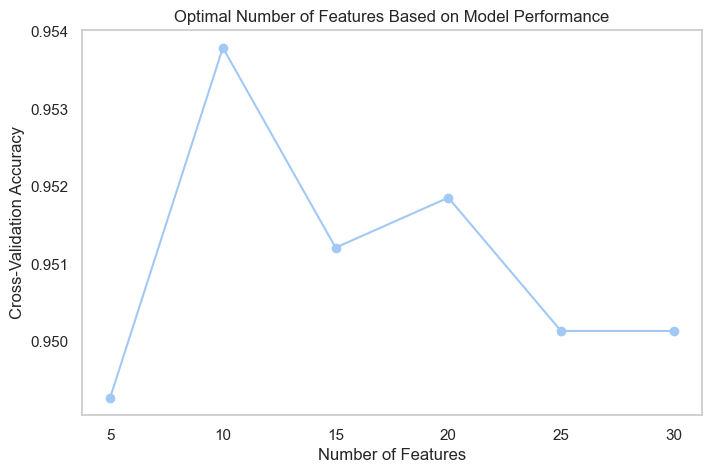

In [28]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# ==================== Define Directories ====================
feature_folder = 'feature_selection'
os.makedirs(feature_folder, exist_ok=True)

# ==================== Save All Original Features ====================
all_features = X_train_scaled.columns.tolist()
with open(os.path.join(feature_folder, 'all_features.pkl'), 'wb') as f:
    pickle.dump(all_features, f)

print(f"✅ Saved all original features ({len(all_features)}) in 'all_features.pkl'.")

# ==================== Compute & Store Mutual Information ====================

# Set random seed for reproducibility
np.random.seed(42)

# Compute mutual information scores
mi_scores = mutual_info_classif(X_train_scaled, y_train_balanced, random_state=42)

# Store in a DataFrame
mi_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'MI_Score': mi_scores})

# Sort by importance (descending order)
mi_df = mi_df.sort_values(by='MI_Score', ascending=False).reset_index(drop=True)

# Save mutual information scores
mi_df.to_csv(os.path.join(feature_folder, 'mutual_info_scores.csv'), index=False)

print("✅ Saved mutual information scores in 'mutual_info_scores.csv'.")

# Print top features for verification
print("Top Features Based on Mutual Information:")
print(mi_df.head())

# ==================== Determine Optimal Feature Count Using Cross-Validation ====================

# Define different feature set sizes to evaluate
feature_counts = [5, 10, 15, 20, 25, 30]
results = []

for top_n in feature_counts:
    # Select the top N features
    top_features = mi_df.head(top_n)['Feature'].values
    X_train_selected = X_train_scaled[top_features]

    # Perform cross-validation with a Random Forest model
    model = RandomForestClassifier(random_state=42)
    score = cross_val_score(model, X_train_selected, y_train_balanced, cv=5, scoring='accuracy')

    # Store results
    results.append((top_n, score.mean()))

# Find the optimal number of features
best_top_n, best_score = max(results, key=lambda x: x[1])

# Select the best number of features dynamically
selected_features = mi_df.head(best_top_n)['Feature'].values

# Save the selected features
with open('top_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

print(f"✅ Optimal number of features: {best_top_n} (Accuracy: {best_score:.4f})")
print(f"✅ Selected top {best_top_n} features saved in 'top_features.pkl'.")

# -------------------------- Plot Performance vs Feature Count --------------------------
plt.figure(figsize=(8, 5))
plt.plot(feature_counts, [result[1] for result in results], marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Optimal Number of Features Based on Model Performance')
plt.grid()
plt.show()


✅ Selected features saved in 'feature_selection'.


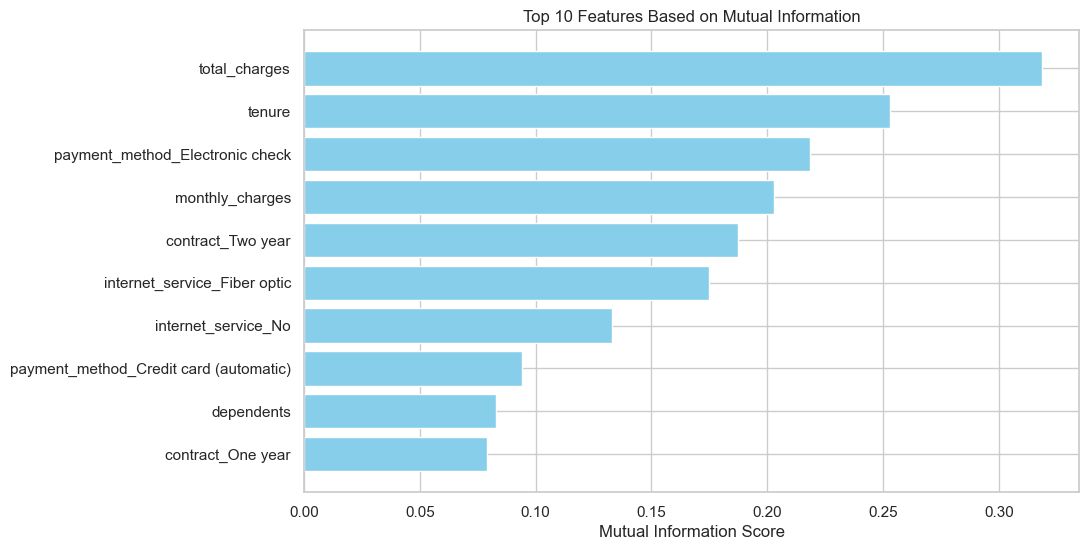

Top 10 Selected Features:
                                  Feature  MI_Score
0                           total_charges  0.318740
1                                  tenure  0.253187
2         payment_method_Electronic check  0.218525
3                         monthly_charges  0.202769
4                       contract_Two year  0.187283
5            internet_service_Fiber optic  0.174864
6                     internet_service_No  0.132807
7  payment_method_Credit card (automatic)  0.093957
8                              dependents  0.082821
9                       contract_One year  0.078918


In [29]:
# ==================== Select & Save Top 15 Features ====================

# Define the fixed number of top features to select
top_n =10  # Fixed to 15

# Select the top 15 features
top_features = mi_df.head(top_n)

# Apply the same feature selection to both training & test data
X_train_selected = X_train_scaled[top_features['Feature']]
X_test_selected = X_test_scaled[top_features['Feature']]

# Save selected features for future use
X_train_selected.to_csv(os.path.join(feature_folder, 'X_train_selected.csv'), index=False)
X_test_selected.to_csv(os.path.join(feature_folder, 'X_test_selected.csv'), index=False)

# Save top features as a pickle file
with open('top_features.pkl', 'wb') as f:
    pickle.dump(top_features, f)

print(f"✅ Selected features saved in '{feature_folder}'.")

# ==================== Display Top 15 Features & Plot Scores ====================

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['MI_Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title(f'Top {top_n} Features Based on Mutual Information')
plt.gca().invert_yaxis()  # Display highest importance at the top
plt.show()

print(f"Top {top_n} Selected Features:")
print(top_features)
